# Статистика, DS-поток
## Задание SP.6

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  70 баллов
* Задача 2 &mdash;  50 баллов
* Задача 3 &mdash;  200 баллов

**Важность задач:**

* *высокая:* задачи 1, 2, 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

Почему все задачи высокой степени? Просто остальные убрали :)

In [ ]:
# Bot check

# HW_ID: ds_sp6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from typing import Iterable
from tqdm import tqdm

import warnings
warnings.simplefilter("ignore")

sns.set(font_scale=1.5, palette='Set2')
sns.set_style("darkgrid")
%matplotlib inline

______________
## Задача 1.
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine (файл `wine.data`) и загрузите их с помощью библиотеки pandas.

In [ ]:
data = pd.read_csv("./wine.data", header=None)
columns = [
    "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", 
    "Magnesium", "Total phenols", "Flavanoids","Nonflavanoid phenols", 
    "Proanthocyanins", "Color intensity", "Hue", 
    "OD280/OD315 of diluted wines", "Proline"
]
data.columns = columns

In [ ]:
data[:3]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

**Ответ:**
$$
\widehat{a} = \overline{X} 
$$
$$
\widehat{\Sigma} = \frac{1}{n}\sum_{i=1}^n (X_i - \widehat{a})(X_i - \widehat{a})^\top
$$

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue" для всех сортов вина вместе.
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

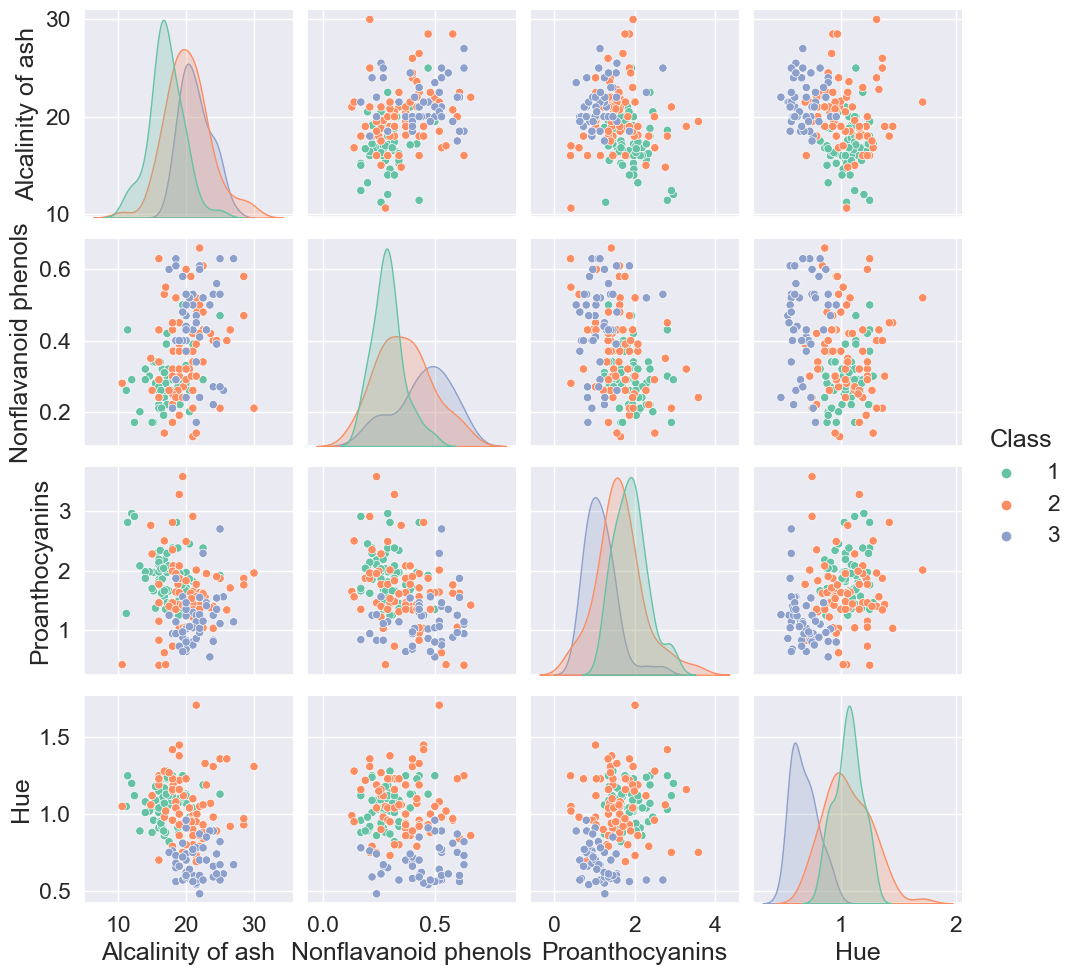

In [ ]:
target_columns = [
    "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue"
]
sns.pairplot(data, vars=target_columns, hue="Class", palette='Set2')
plt.show()

In [ ]:
sample = data[target_columns]

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $a$ и матрицы ковариаций $\Sigma$ по выборке. Использование циклов наказуемо.

In [71]:
def mle_for_mean(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    '''
    
    return np.mean(sample, axis=0).values

In [72]:
def mle_for_covariance_matrix(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    '''
    
    n = len(sample)
    a = mle_for_mean(sample)
    sigma = ((sample - a).T @ (sample - a) ) / n
    return sigma.values

Вычислим значения для выборки

In [ ]:
a = mle_for_mean(sample)
sigma = mle_for_covariance_matrix(sample)

Визуализируйте полученный результат. Для каждой пары признаков постройте информативный график, на котором будут:

1. Точки выборки.

2. Плотность нормального распределения с оцененными параметрами, которую изобразите в виде линий уровня.

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

In [ ]:
def get_two_dim_density(a, sigma, ind_1, ind_2):
    '''
    Возвращает проекции вектора средних и ков. мат. 
    на 2 признака.
    
    :param a: вектор средних
    :param sigma: матрица ковариаций
    :param ind_1: индекс первого признака
    :param ind_2: индекс второго признака
    :return: вектор средних и матрица ковариации 
    проекции на два признака ind_1 и ind_2
    '''
    
    a_two_dim = a[[ind_1, ind_2]]
    sigma_two_dim = np.array([
        [sigma[ind_1, ind_1], sigma[ind_1, ind_2]], 
        [sigma[ind_2, ind_1], sigma[ind_2, ind_2]] 
    ])
    return (a_two_dim, sigma_two_dim)

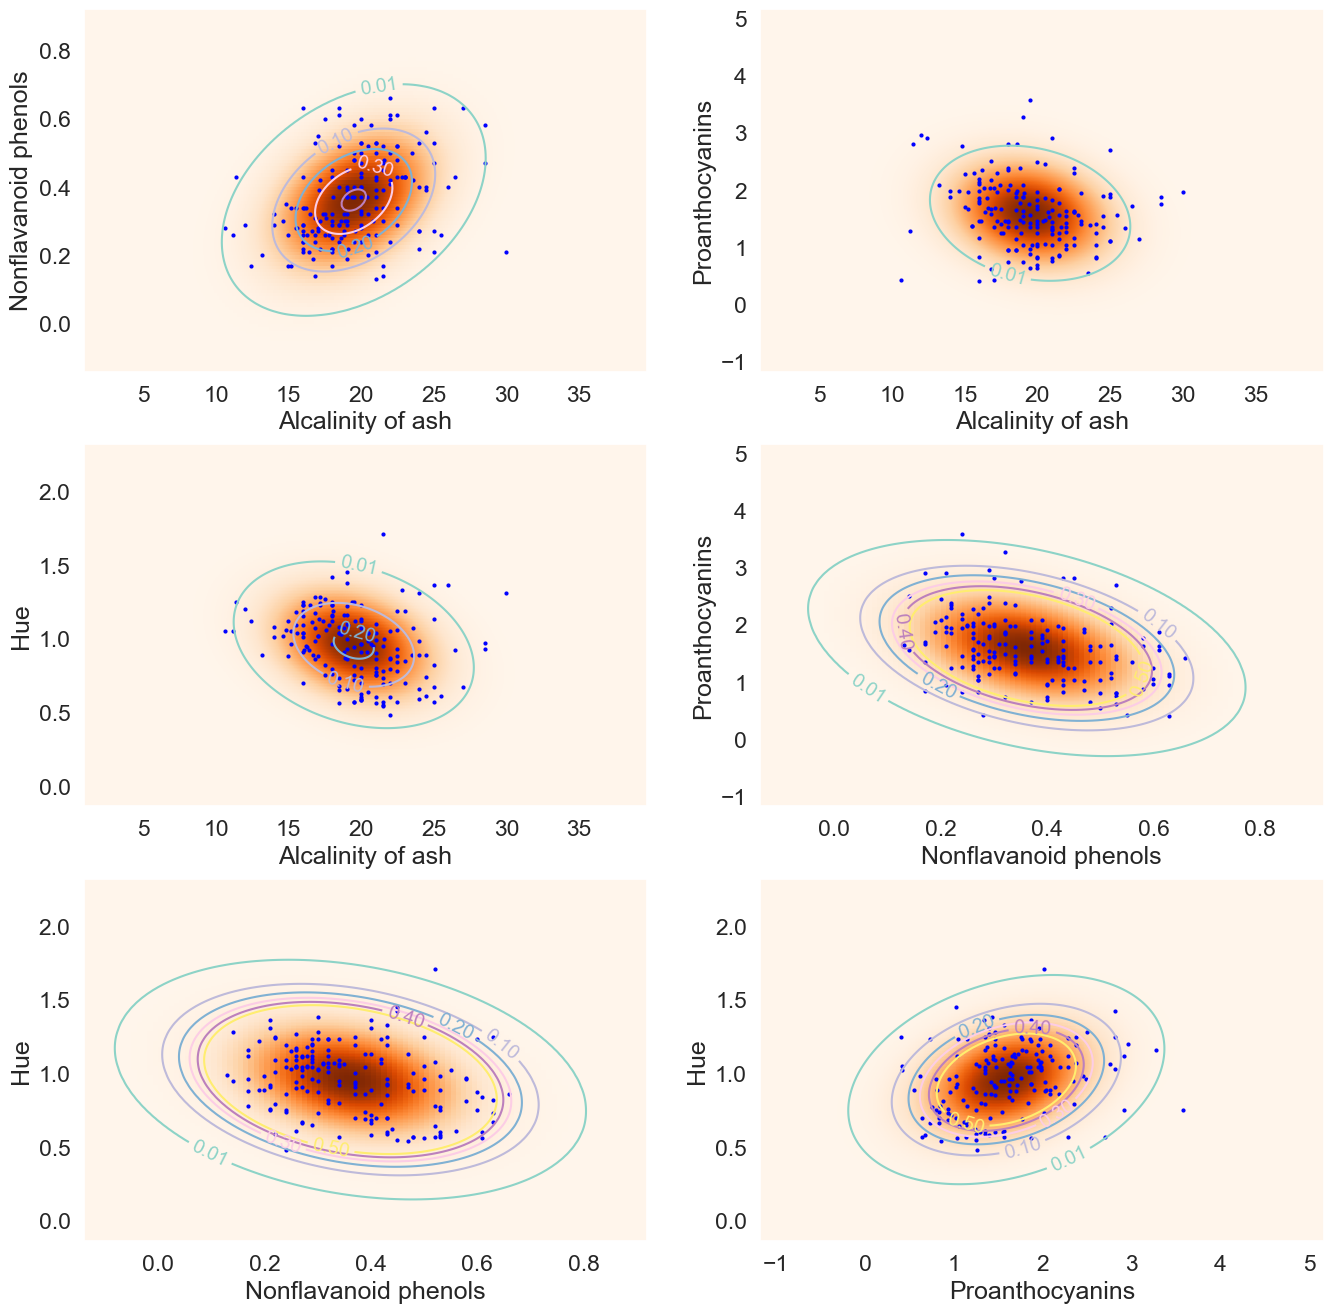

In [ ]:
plt.figure(figsize=(16, 16))
for i, (ind_1, ind_2) in enumerate(
    itertools.combinations(range(len(target_columns)), 2)
):
    # выделение двух рассматриваемых признаков
    feature_1, feature_2 = target_columns[ind_1], target_columns[ind_2]
    # подсчет отступа для сетки
    diff_1 = (sample[feature_1].max() - sample[feature_1].min()) / 2
    diff_2 = (sample[feature_2].max() - sample[feature_2].min()) / 2
    # создание сетки от мин-отступ до макс+отступ с шагом 1e-2
    grid = np.mgrid[
        sample[feature_1].min()-diff_1:sample[feature_1].max()+diff_1:1e-2, 
        sample[feature_2].min()-diff_2:sample[feature_2].max()+diff_2:1e-2
    ]
    pos = np.dstack((grid[0], grid[1]))

    # получение плотности проекции 4рехмерного норм. расп. на два признака
    multivariate_normal = sps.multivariate_normal(
        *get_two_dim_density(a, sigma, ind_1, ind_2)
    )
    density = multivariate_normal.pdf(pos)
    
    # само построение графиков плотности, линий уровня и точек выборки
    plt.subplot(3, 2, i + 1)
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
    CS = plt.contour(
        grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5], cmap='Set3'
    )
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f')
    plt.scatter(sample[feature_1], sample[feature_2], color='blue', s=4)
     
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)

**Вывод:** Как видим визуально полученные оценки действительно достаточно хорошо аппроксимируют данные. Исходя из данных наши оценки получились несмещненными, но возможно недостаточно точными. Видно что в некоторых областях уровня лежит малое число точек, возможно удалив выбросы оценки получились бы менее шумными.

__________________
## Задача 2.

**1.** Загрузите <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/">данные</a>, которые содержат набор медицинских исследований, проведенных в рамках исследования о наличии у пациента сахарного диабета. Пациенты относятся к индейскому племени Пима.

In [149]:
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Выведите описательные статистики (метод `describe`) для всех признаков.  Округлите до второго знака после запятой.

In [150]:
features = ["Pregnancies", "Glucose", "BloodPressure",
            "SkinThickness", "Insulin",	"BMI", 
            "DiabetesPedigreeFunction", "Age"]
target = "Outcome"

In [151]:
diabetes_data[features].describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** 
Самая ощутимая разница заметна между средним и медианой у признака `Insulin`(перекос в сторону в больших значений), не столь большие разницы есть в признаках `DiabetesPedigreeFunction` и `Age`. Такие разницы могут быть объяснены логически, потому чтоб например, инсулин либо равен нулю, либо имеет достаточно большее значение. Для признака `Age` же такое может возникнуть, потому что если люди переживают средний возраст, то дальше живут значительно дольше. Для остальных признаков различие кажется не таким существенным.

**Замечание:** *Делать вывод о наличии выбросов только по разнице между медианой и средним, неправильно. Тем не менее, это хороший повод поставить и проверить гипотезу. Аппарат проверки гипотез в курсе будет рассказан позже.*

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует таргеты, а ось `y` — значениям параметра. Используйте функцию `seaborn.boxplot`.

In [152]:
def plot_groupby(df, by: str, plotter=sns.boxplot):
    '''
    Функция для группировки метрики по значению служебного столбца.
    Отображает результаты в виде матрицы из картинок 
    (по одной картинке на каждую метрику).

    :param by: название служебного столбца, по значениям которого формируются группы
    :param plotter: тип графика класс из seaborn или matplotlib
    '''
    
    features = np.setdiff1d(df.columns, by)
    with sns.axes_style("whitegrid"):
        n_rows = np.ceil(len(features) / 3).astype(int)
        n_cols = 3

        fig, axes = plt.subplots(
            n_rows, n_cols, 
            figsize=(14, 7 * n_rows)
        )
        for i, col in enumerate(features):
            ax = axes[i // 3, i % 3]
            plotter(
                x=by, 
                y=col, 
                data=df,
                ax=ax
            )
            ax.set_xlabel(by, weight="bold")
        plt.tight_layout()

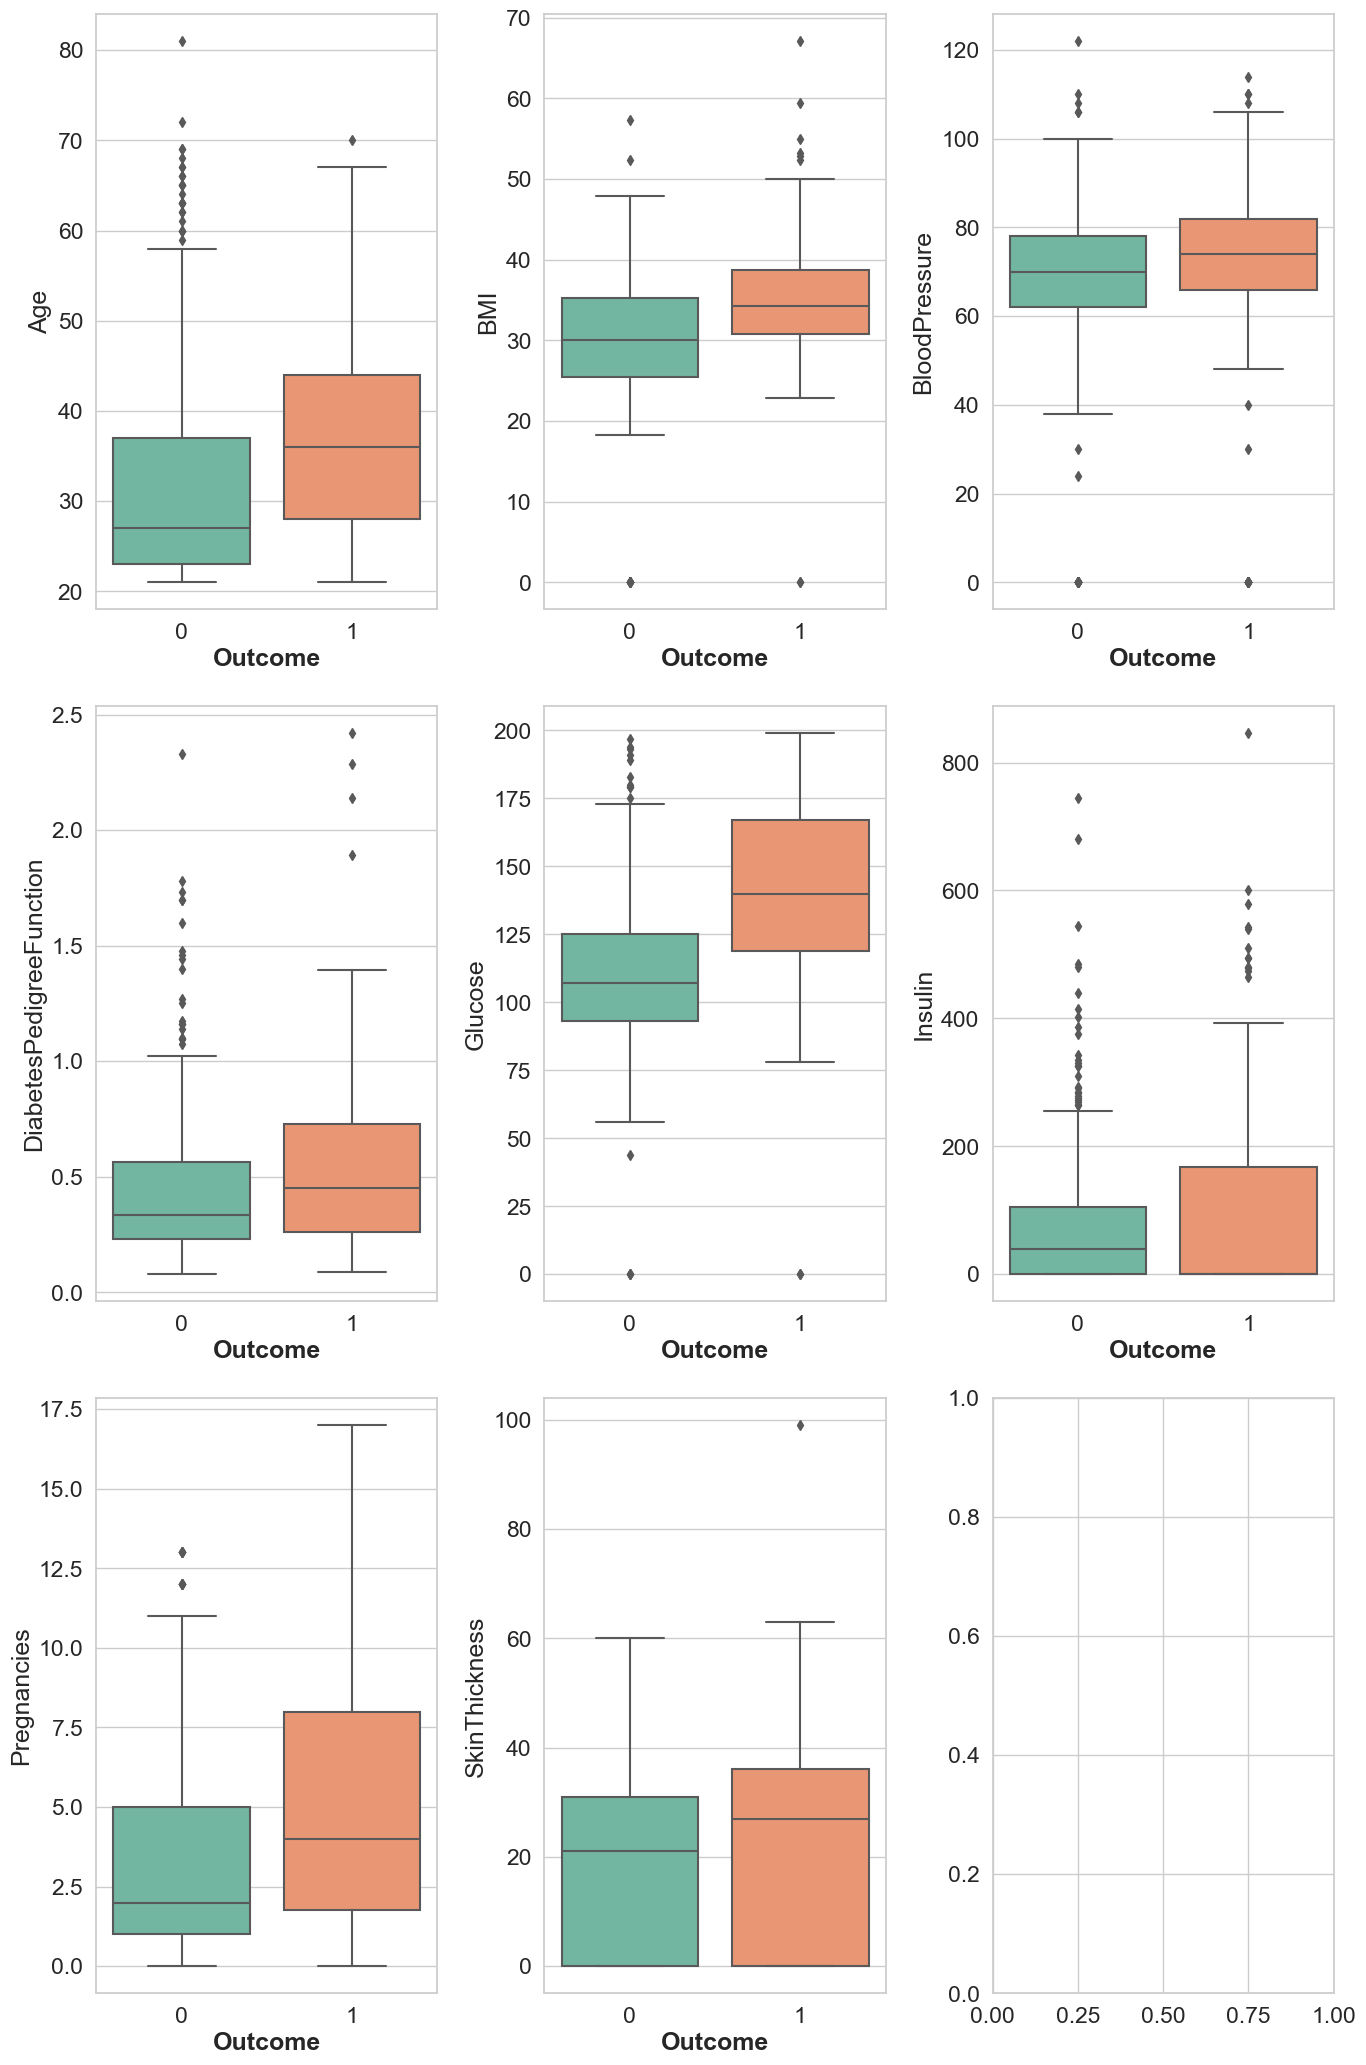

In [153]:
plot_groupby(
    diabetes_data, 
    by=target, 
    plotter=sns.boxplot
)

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** 
- Ящик с усами устроен следующим образом: 
    * линия внутри — медиана
    * верхняя граница ящика — 0.75-квантиль;
    * нижняя граница ящика — 0.25-квантиль;
    * длина каждого уса — 1.5 **интерквартильный размах**, разность между третьей и первой квантилями;
    * над и под усами — явные выбросы.
- Ящик с усами позволяет быстро оценить распределение на соответствие со здравым смыслом, а также понять, в каких признаках сидит больше всего выбросов. В данном случае гипотеза о том, что больше всего выбросов в признаках `Insulin`, `DPF` и `Age` подтверждается.

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;
- медиану средних Уолша.

Для реализации медианы средних Уолша без циклов обратите внимание на следующие **подсказки**:
1. Что будет, если вы сложите вектор-строку и вектор столбец одинакового размера?
2. Если вы правильно ответите на прошлый вопрос, вам пригодится `np.triu_indices_from`.

In [154]:
def walsh_median(X: Iterable):
    '''
    Функция для вычисления медианы средних Уолша.
    :param X: выборка
    :return: медиана средних Уолша по выборке X
    '''
    
    # делаем из выборки np.array размера n,
    # а из него — вектор-столбец
    X_vec = np.array(X).reshape(-1, 1)
    pairwise_sums = (X_vec + X_vec.T) / 2
    # получаем индексы элементов матрицы на главной диагонали и выше
    indices = np.triu_indices_from(pairwise_sums)
    pairwise_sums = np.asarray(pairwise_sums[indices])
    return np.median(pairwise_sums)

In [180]:

comparation_table = pd.DataFrame(columns = ["Выборочное среднее",
        "Медиана средних Уолша",
        "Выборочная медиана" ])

for col in diabetes_data.columns[:-1]:
    feature = diabetes_data[col].dropna().values
    comparation_table.loc[col] = [np.round(np.mean(feature), 2),
                                np.round(walsh_median(feature), 2), 
                                np.round(np.median(feature), 2)]

comparation_table

,Выборочное среднее,Медиана средних Уолша,Выборочная медиана
Pregnancies,3.85,3.50,3.00
Glucose,120.89,119.50,117.00
BloodPressure,69.11,71.00,72.00
SkinThickness,20.54,20.00,23.00
Insulin,79.80,62.50,30.50
BMI,31.99,32.00,32.00
DiabetesPedigreeFunction,0.47,0.43,0.37
Age,33.24,32.00,29.00


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** Чем больше статистика устойчива к выбросам (или *робастна*), тем более консервативно её значение на выборке с выбросами со стороны больших значений, как у нас. Выборочное среднее робастной статистикой в принципе не является. Медиана игнорирует числовую природу данных и опирается исключительно на порядок элементов выборки, потому, очевидно, робастна. Медиана средних находится между ними, т.к. квадратичное число элементов выборки позволяет и учесть плотность, и заметить наличие сдвига вверх.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.

**Выводы:** 
1. В реальных данных почти всегда есть выбросы. Робастные статистики остаются интерпретируемыми в этих условиях.
2. Самый простой способ найти выбросы вручную — графики: `boxplot` или `violinplot`.
3. Занимаясь статистикой, нужно отдавать себе отчёт, что построенная модель является только лишь приближением реальности, и многие её допущения (например, о независимости измерений) чаще всего неверны. Нужно понимать,когда это критично, а когда нет (как сейчас).

______________
## Задача 3.

> *Указание.* При решении этой задачи посмотрите решения задач SP.2.3-4 и SP.3.1-2. Если потребуется, можно копировать код из своих решений этих задач или решений, которые выложены на вики.

Предлагается изучить свойства оценок параметра сдвига для распределения Коши, обладающего плотностью $$p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}.$$

> Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.
>
> В анализе данных такое распределение применяться для получения робастных процедур.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

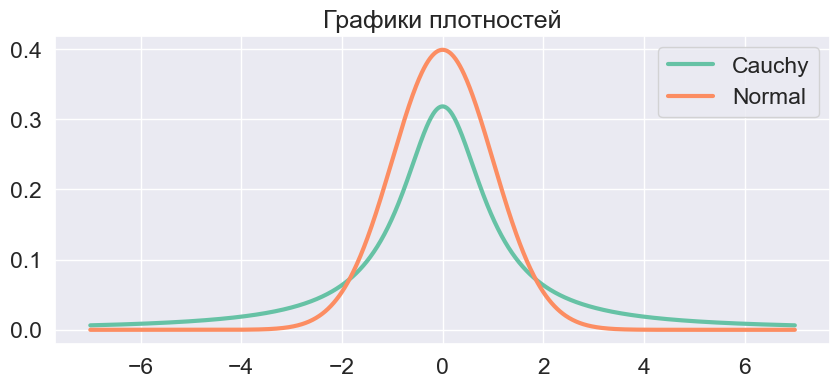

In [2]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 4))
plt.title('Графики плотностей')
plt.plot(grid, sps.cauchy.pdf(grid), label='Cauchy', lw=3)
plt.plot(grid, sps.norm.pdf(grid), label='Normal', lw=3)
plt.legend()
plt.show()

**Вывод:** Распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**
$$
\sigma^2_{\alpha} = \frac{2}{(1-2\alpha)^2} \left( \int\limits^{u_{1 - \alpha}}_0 x^2 p(x) dx + \alpha u^2_{1 - \alpha} \right) =  \frac{2}{(1-2\alpha)^2} \left(\frac{1}{\pi} \int\limits^{u_{1 - \alpha}}_0 \frac{x^2}{1+x^2} dx + \alpha u^2_{1 - \alpha} \right) = \\
= \left| \int \frac{x^2}{1+x^2} dx = \int \left(1 - \frac{1}{1+x^2} \right) dx = x - \arctan x + C\right| = \\
= \frac{2}{(1 - 2\alpha)^2}
\left[\frac{1}{\pi} \left(u_{1-\alpha} - \arctan u_{1-\alpha} \right)+ \alpha u^2_{1 - \alpha} \right]
$$

Вычисление значений асимптотической дисперсии и построение графика:

In [3]:
# Сетка с шагом 0.001.
alphas = np.linspace(0, 0.5, 501)[1:-1]

quantiles = sps.cauchy.ppf(1 - alphas)
sigmas = 2 / (1 - 2 * alphas) ** 2 * (
    1 / np.pi * (quantiles - np.arctan(quantiles)) + alphas * quantiles ** 2)
alpha_argmin = alphas[np.argmin(sigmas)]

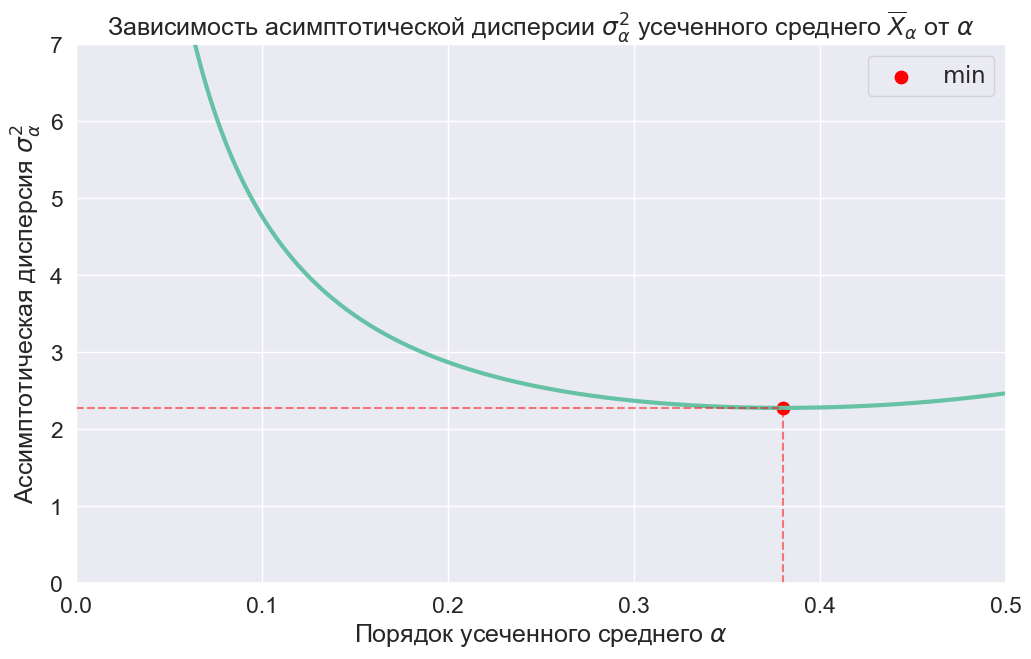

In [4]:
plt.figure(figsize=(12, 7))
plt.plot(alphas, sigmas, lw=3)

ylim = (0, 7)
xlim = (0, 0.5)
plt.ylim(ylim)
plt.xlim(xlim)

plt.hlines(sigmas.min(), 0, alpha_argmin,
           linestyles="--", color='red', alpha=0.5)
plt.vlines(alpha_argmin, ylim[0], sigmas.min(),
           linestyles="--", color='red', alpha=0.5)
plt.scatter(alpha_argmin, sigmas.min(), color='red',
            label="$\\min$", s=80)

plt.xlabel('Порядок усеченного среднего $\\alpha$')
plt.ylabel('Ассимптотическая дисперсия $\\sigma^2_\\alpha$')
plt.title('Зависимость асимптотической дисперсии $\\sigma_{\\alpha}^2$ '
          'усеченного среднего $\\overline{X}_{\\alpha}$ от $\\alpha$')
plt.legend()
plt.show()

Значение, при котором асимптотическая дисперсия минимальна:

In [5]:
alpha_argmin

0.38

Минимальное значение асимптотической дисперсии:

In [6]:
sigma_min = sigmas.min()
print("{:.2f}".format(sigma_min))

2.28


При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ и вывод:** $\alpha \approx 0.38$, $\sigma^2_{\alpha} = 2.28$.

**3.** 
Сгенерируйте выборку $X_1, ... X_{200}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев:

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ (см. замечание ниже);
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя
    * выборочную медиану;
    * усеченное среднее порядка $\alpha$, на котором достигается минимум $\sigma^2_{\alpha}$;
    * медиану средних Уолша;
    * любую асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

*Замечания.*
1. Первый случай призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.
2. Производите отладку кода на малых числах.
3. Если не успеваете до дедлайна, можете сократить количество вариантов, потеряв при этом некоторую часть баллов.


**Решение:**

1). Точный доверительный интервал уровня доверия $\alpha$ минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

Доверительный интервал: 

$$
\left(\overline{X} - \frac{\sigma z_{(1+\alpha)/2}}{\sqrt{n}},
\overline{X} + \frac{\sigma z_{(1+\alpha)/2}}{\sqrt{n}}\right),
$$

где $\sigma = 1$, а $z_{\gamma}$ &mdash; $\gamma$-квантиль стандартного нормального распределения.

Пояснение:

С помощью центрирования и нормирования получаем $\eta = \sqrt{n} (\overline{X} - \theta) \sim N(0, 1)$.

Тогда $P\left(\overline{X} - \frac{z_{(1 + \alpha)/2}}{\sqrt{n}} < \theta < \overline{X} + \frac{z_{(1 + \alpha)/2}}{\sqrt{n}}\right)  = P(-z_{(1 + \alpha)/2} < \eta < z_{(1 + \alpha)/2}) = \alpha$ 

Таким образом, мы нашли точный доверительный интервал.

У стандартного нормального распределения график плотности симметричен относительно оси Oy и убывает на положительной полуоси. Поэтому наименьшую длину среди интервалов с одинаковым уровнем доверия имеет симметричный относительно нуля. Ему соответствует квантиль уровня $\frac{1 + \alpha}{2}$. Так как границы искомого доверителного интервала зависят линейно от границ этого отрезка, то чтобы получить доверительный интервал наименьшей длины, надо выбрать отрезок наименьшей длины. Ему соответствует квантиль уровня  $\frac{1 + \alpha}{2}$

2.1 Точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя выборочную медиану.

$$
\left( \widehat{\mu} - z_{(1 + \alpha)/2} \frac{\pi}{2 \sqrt{n}}, \widehat{\mu} + z_{(1 + \alpha)/2} \frac{\pi}{2 \sqrt{n}} \right).
$$

2.2 Точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя усеченное среднее порядка $\alpha$, на котором достигается минимум $\sigma^2_{\alpha}$

$$
\left( \widehat{\mu} - z_{(1 + \alpha)/2} \sqrt{\frac{2.28}{n}}, \widehat{\mu} + z_{(1 + \alpha)/2} \sqrt{\frac{2.28}{n}} \right).
$$

2.3 Точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя медиану средних Уолша.

$$
\left( \widehat{\mu} - z_{(1 + \alpha)/2} \frac{\pi}{\sqrt{3 n}}, \widehat{\mu} + z_{(1 + \alpha)/2} \frac{\pi}{\sqrt{3 n}} \right).
$$

Асимптотическая дисперсия медианы средних Уолша: $\frac{1}{12 C^2} = \frac{\pi^2}{3} \approx 3.29$, где
$$ C =  \int\limits_{\mathbb{R}} p^2(x) dx
= \int\limits_{\mathbb{R}}\frac{1}{(\pi(1 + x^2))^2} dx
= \left| x = \tan u \right| = \\
= \frac{1}{\pi^2} \int\limits^{\pi/2}_{-\pi/2} \frac{1}{(1 + (\tan u)^2)^2} d(\tan u) = \\
= \frac{1}{\pi^2} \int\limits^{\pi/2}_{-\pi/2} \frac{1}{\left( \frac{1}{\cos^2 u} \right)^2} \cdot \frac{1}{\cos^2 u} du
= \frac{1}{\pi^2}  \int\limits^{\pi/2}_{-\pi/2} \cos^2 u \; du
= \frac{1}{\pi^2} \int\limits^{\pi/2}_{-\pi/2} \frac{1}{2} + \frac{\cos 2u}{2} du = \\
= \left| t = 2u \right| = \frac{1}{\pi^2}  \left(\frac{\pi}{2}  + \int\limits^{\pi}_{-\pi} \frac{\cos t}{4} dt \right) = \frac{1}{2 \pi}.
$$


2.4 Точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя асимптотически эффективную оценку.

$$
\left( 
\widehat{\mu} + \frac{\sum\limits_{i=1}^n \frac{X_i - \widehat{\mu}}{1 + (X_i - \widehat{\mu})^2}}{\sum\limits_{i=1}^n \frac{1 - (X_i - \widehat{\mu})^2}{(1 + (X_i - \widehat{\mu})^2)^2}} - z_{(1 + \alpha)/2} \sqrt{\frac{2}{n}}, 
\widehat{\mu} + \frac{\sum\limits_{i=1}^n \frac{X_i - \widehat{\mu}}{1 + (X_i - \widehat{\mu})^2}}{\sum\limits_{i=1}^n \frac{1 - (X_i - \widehat{\mu})^2}{(1 + (X_i - \widehat{\mu})^2)^2}} + z_{(1 + \alpha)/2} \sqrt{\frac{2}{n}}
\right)
$$

In [7]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка'
):
    """
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись к графику
    """
    
    time = np.arange(len(left)) + 1
    
    assert len(time) == len(right)
    with sns.axes_style("whitegrid"):
        if not sample is None:
            plt.scatter(time, sample, alpha=0.3, color=color_sample,
                        s=40, label='Элемент выборки')
        if not estimation is None:
            plt.plot(time, estimation, color=color_estimation, 
                    linewidth=2.5, label=label_estimation) 
            
        plt.fill_between(time, left, right, alpha=0.25, color=color_interval)
        plt.legend(fontsize=16)
        plt.ylim(ylim) 
        plt.xlabel('Размер выборки')
        plt.title('Зависимость доверительного интервала от размера выборки')
        plt.grid()

Сгенерируем выборку из распределения Коши и объявим списки, в которые будем складывать реализации статистик для построения интервалов

Посчитаем все необходимые статистики для разных размеров выборки

In [8]:
def walsh_averages_median(X):
    '''
    Функция для вычисления медианы средних Уолша.
    :param X: выборка
    :return: медиана средних Уолша по выборке X
    '''
    
    # делаем из выборки np.array размера n,
    # а из него — вектор-столбец
    X_vec = np.array(X).reshape(-1, 1)
    pairwise_sums = (X_vec + X_vec.T) / 2
    # получаем индексы элементов матрицы на главной диагонали и выше
    indices = np.triu_indices_from(pairwise_sums)
    pairwise_sums = np.asarray(pairwise_sums[indices])
    return np.median(pairwise_sums)

Напишем функции для вычисления интервалов

In [9]:
def count_normal_quantile(alpha):
    '''
    Функция для вычисления 1/2 + $\alpha$/2 квантиля нормального распределения
    :param alpha: уровень доверия
    :return: значение квантиля
    '''
    return sps.norm.ppf(1/2 + alpha/2)

def normal_interval(sample, alpha=0.95):
    '''
    Функция для вычисления точного доверительного интервала
      минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$
    :param sample: выборка
    :param alpha: уровень доверия
    :return: левая и правая границы интервала, значение оценки
    '''

    n_values = np.arange(1, len(sample) + 1)
    sample_mean = np.cumsum(sample) / n_values
    # Выборочное среднее
    left_norm = (sample_mean 
                - sps.norm.ppf(1/2 + alpha/2) / np.sqrt(n_values))
    right_norm = (sample_mean 
                + sps.norm.ppf(1/2 + alpha/2) / np.sqrt(n_values))

    return left_norm, right_norm, sample_mean

def median_interval(sample, alpha=0.95):
    '''
    Функция для вычисления точного асимптотичесого доверительного интервал
      с выборочной медианой
    :param sample: выборка
    :param alpha: уровень доверия
    :return: левая и правая границы интервала, значение оценки
    '''

    n_values = np.arange(1, len(sample) + 1)
    z_alpha = count_normal_quantile(alpha)

    A = np.tril(sample)
    A[np.triu_indices(len(sample), k=1)] = np.nan
    sample_median = np.nanmedian(A, axis=1)

    # Выборочная медиана
    left_median = (sample_median 
                  - z_alpha
                  * np.pi / (2*np.sqrt(n_values)))
    right_median = (sample_median 
                    + z_alpha
                    * np.pi / (2*np.sqrt(n_values)))

    return left_median, right_median, sample_median

def cut_interval(sample, alpha=0.95):
    '''
    Функция для вычисления точного асимптотичесого доверительного интервал
      с усеченное среднее порядка $\alpha$, на котором достигается минимум $\sigma^2_{\alpha}$
    :param sample: выборка
    :param alpha: уровень доверия
    :return: левая и правая границы интервала, значение оценки
    '''

    n_values = np.arange(1, len(sample) + 1)
    z_alpha = count_normal_quantile(alpha)

    trim_estimation = np.array([
        sps.trim_mean(sample[:i], proportiontocut=alpha_argmin) for i in n_values])

    # Усеченное среднее
    left_cut = (trim_estimation 
                - z_alpha
                * np.sqrt(sigma_min / n_values))
    right_cut = (trim_estimation 
                    + z_alpha
                * np.sqrt(sigma_min / n_values))
    
    return left_cut, right_cut, trim_estimation


def walsh_interval(sample, alpha=0.95):
    '''
    Функция для вычисления точного асимптотичесого доверительного интервал
      с медианой средних Уолша
    :param sample: выборка
    :param alpha: уровень доверия
    :return: левая и правая границы интервала, значение оценки
    '''

    n_values = np.arange(1, len(sample) + 1)
    z_alpha = count_normal_quantile(alpha)
    
    sample_uolsh_median = np.array([
        walsh_averages_median(sample[:i]) for i in n_values])

    # Медиана средних Уолша
    left_walsh = (sample_uolsh_median 
                - z_alpha
                * np.pi / (np.sqrt(3 * n_values)))
    right_walsh = (sample_uolsh_median 
                    + z_alpha
                    * np.pi / (np.sqrt(3 * n_values)))
    
    return left_walsh, right_walsh, sample_uolsh_median


def effective_interval(sample, alpha = 0.95):
    '''
    Функция для вычисления точного асимптотичесого доверительного интервал
      с асимптотически эффективной оценкой
    :param sample: выборка
    :param alpha: уровень доверия
    :return: левая и правая границы интервала, значение оценки
    '''
    
    left_eff = [] # лквая граница интервала

    right_eff = [] # правая граница интервала
    estimation_eff = [] # значение оценки

    A = np.tril(sample)
    A[np.triu_indices(len(sample), k=1)] = np.nan
    sample_median = np.nanmedian(A, axis=1)
    
    z_alpha = count_normal_quantile(alpha)

    for i in range(1, len(sample)+1):
        # Одношаговая оценка в модели Коши
        num = (
            (sample[:i] - np.median(sample[:i]))
            / (1 + (sample[:i] - sample_median[i-1]) ** 2)
        ).sum()
        denum = (
            (1 - (sample[:i] - sample_median[i-1]) ** 2)
            / (1 + (sample[:i] - sample_median[i-1]) ** 2) ** 2
        ).sum()
        
        estimation_eff += [sample_median[i-1] + num / denum]
        left_eff += [sample_median[i-1] + num / denum
                    - z_alpha * np.sqrt(2 / i)]
        right_eff += [sample_median[i-1] + num / denum
                      + z_alpha * np.sqrt(2 / i)]
        
    return left_eff, right_eff, estimation_eff

In [10]:
functions_array = [ 
    normal_interval,
    median_interval,
    cut_interval,
    walsh_interval,
    effective_interval
]

colors_array = [
    '#FF66FF',
    '#00CC66',
    '#660066',
    '#000066',
    '#FF3300'
]

labels_array = [
    r'Среднее $N(\theta, 1)$',
    r'Медиана $Cauchy(\theta)$',
    r'Усеченное среднее порядка $\alpha$',
    r'Медиана средних Уолша $Cauchy(\theta)$',
    r'Ас. эфф. оценка $Cauchy(\theta)$'
]

sample_size = 200 # размер выборки

alpha = 0.95 # уровень доверия

cauchy_sample = sps.cauchy.rvs(size=sample_size) # выборка


Построим графики с доверительными интервалами

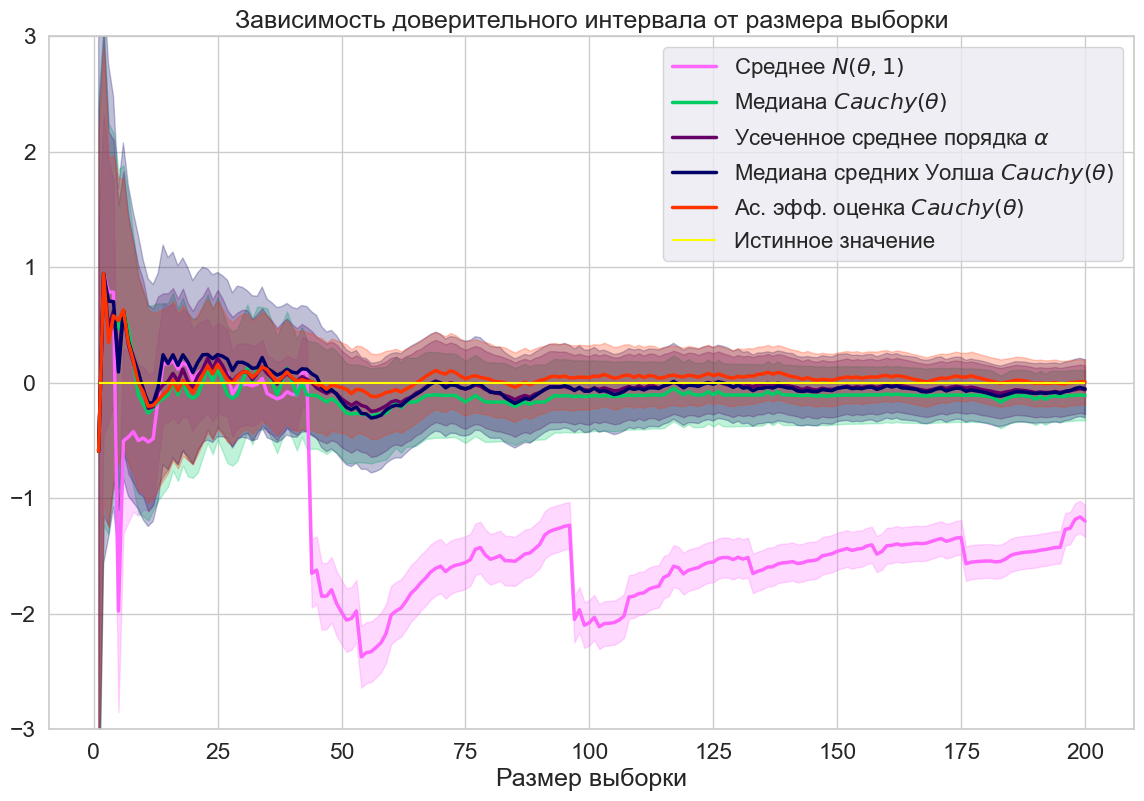

In [11]:
plt.figure(figsize=(14,9))

for interval_function, color, label in zip(functions_array, 
                                           colors_array, labels_array):
    left, right, estimation = interval_function(cauchy_sample)

    draw_confidence_interval(
        left, right, estimation, None, (-3, 3),
        color, color, label_estimation=label
    )

plt.hlines(0, 1, sample_size, color='yellow', label='Истинное значение')
plt.legend(fontsize=16)
plt.grid()
plt.show()

Посмотрим поближе:

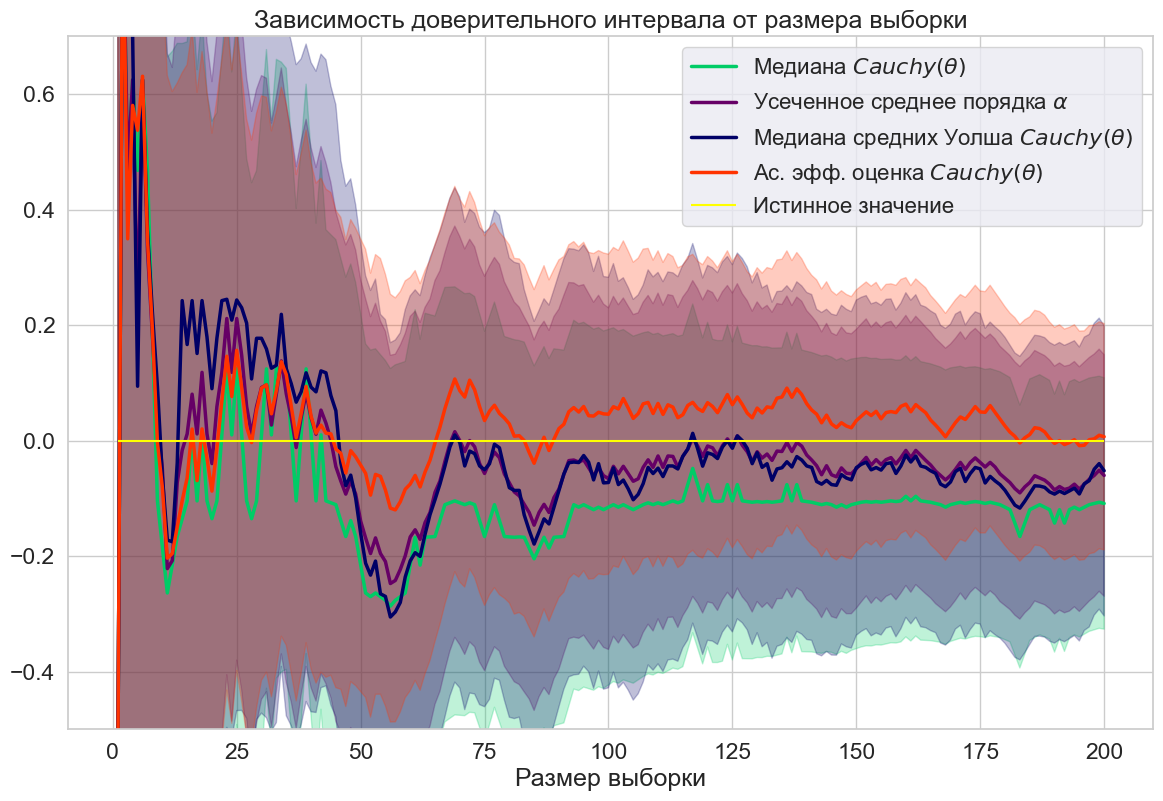

In [12]:
plt.figure(figsize=(14,9))

for interval_function, color, label in zip(functions_array[1:], 
                                           colors_array[1:], labels_array[1:]):
    left, right, estimation = interval_function(cauchy_sample)

    draw_confidence_interval(
        left, right, estimation, None, (-0.5, 0.7),
        color, color, label_estimation=label
    )

plt.hlines(0, 1, sample_size, color='yellow', label='Истинное значение')
plt.legend(fontsize=16)
plt.show()

**Вывод:** 
1. Наиболее узкий интервал — асимптоически эффективный, что соответствует теоретическим свойствам асимптотически эффективных оценок — в асимптотическом подходе данная оценка имеет наименьшую асимптотическую дисперсию среди всех оценок, которые имеют непрерывную асимтпотическую дисперсию.
2. Хуже всех показала себя параметрическая модель нормального распределения — все дело в том, что у распределения Коши не существует матожидания, а среднее по выборке имеет то же самое распределение, что и один элемент выборки. 
3. Как видим оставшиеся оценки очень похожи между собой, визуально дисперсии почти не отличаются.

**4.** Сравните все исследуемые интервалы по величине доли покрытия истинного значения $\theta$, а также по средней длине интервала. Сравнение проведите для всех размеров выборки от 1 до 200 включительно. 

*Замечания.*
1. Производите отладку кода на малых числах.
2. Нужно выполнить достаточное количество семплирований выборок, не менее 1000.
3. Если код работает больше часа, разрешается проводить сравнение для размеров выборок по сетке с некоторым шагом, больше 1. При этом сделайте замеры времени выполнения ячеек с помощью `%%time`.
4. Если не успеваете до дедлайна, можете сократить количество перебираемых вариантов, потеряв при этом некоторую часть баллов.

**Решение:**

In [13]:
n_iter = 1000 # число итераций
theta = 0 # истинное значение параметра

theta_arr = np.array([theta] * sample_size)
n_values = np.arange(1, sample_size + 1)

# создадим словари для хранения полученных результатов
coverage = {}
mean_length = {}

for label in labels_array:
    coverage[label] = np.array([])
    mean_length[label] = np.array([])

for _ in tqdm(range(n_iter)):
    cauchy_sample = sps.cauchy(theta).rvs(size=sample_size) # выборка

    # для одной выборки считаем все интервалы и сохраняем
    for interval_function, label in zip(functions_array, labels_array):
        left, right, _ = interval_function(cauchy_sample)

        is_in = (left < theta_arr) & (theta_arr < right)
        coverage[label] = np.append(coverage[label], is_in.cumsum() / n_values, axis=0)

        mean_length[label] = np.append(mean_length[label], np.array(right)
                                        - np.array(left), axis = 0)

# посчитаем среднее по всем итерациям
for label in labels_array:
    coverage[label] = np.mean(coverage[label].reshape(n_iter, -1), axis=0)
    mean_length[label] = np.mean(mean_length[label].reshape(n_iter, -1), axis=0)
    

100%|██████████| 1000/1000 [00:29<00:00, 33.98it/s]


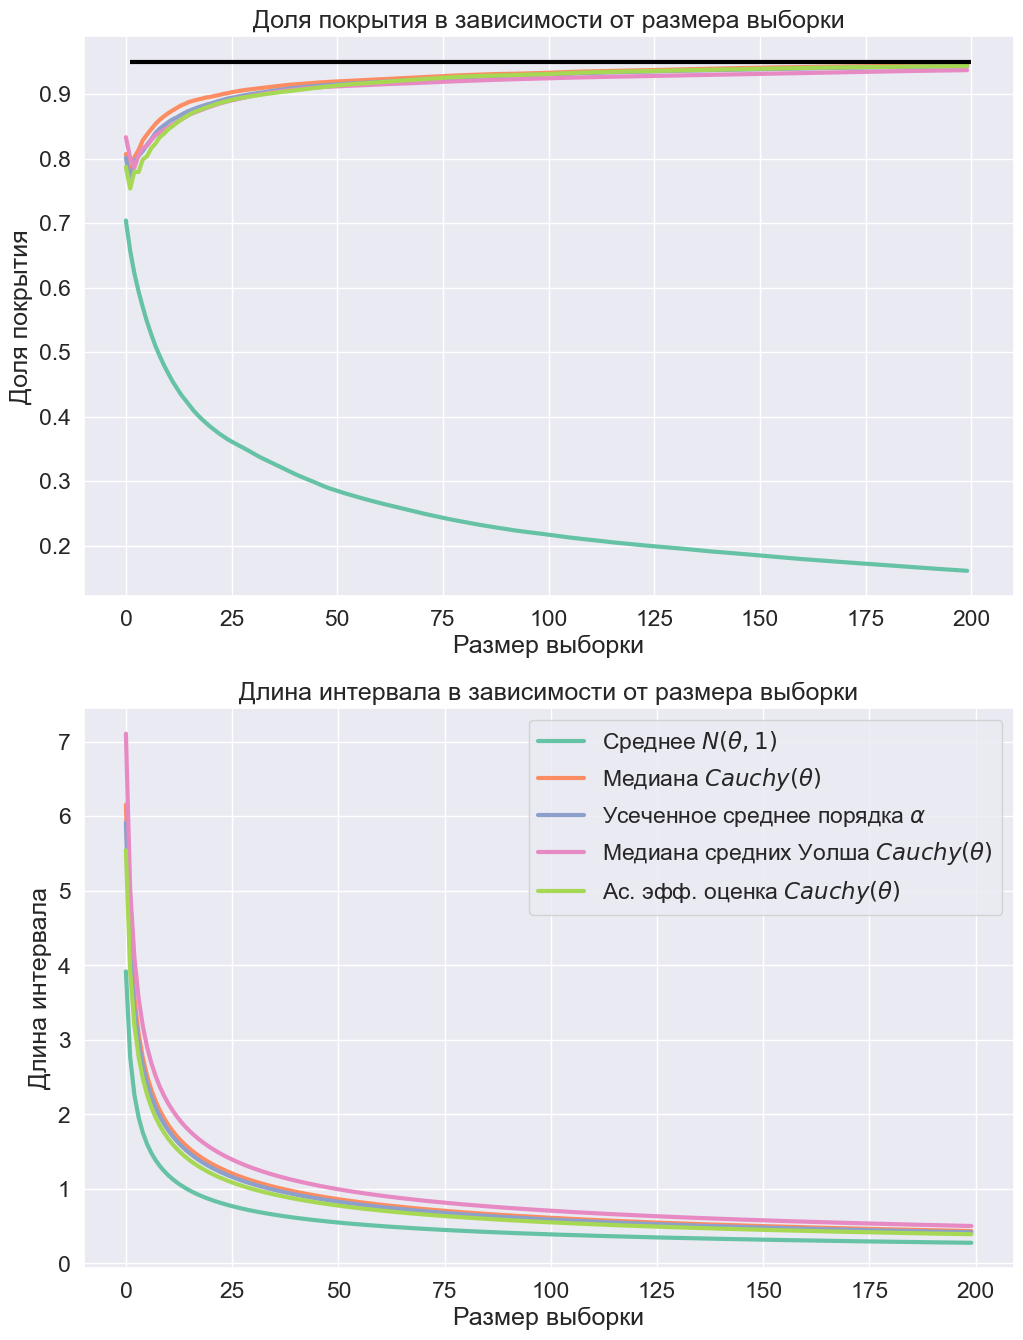

In [14]:
plt.figure(figsize=(12, 16))

plt.subplot(2, 1, 1)
for label in labels_array:
    plt.plot(coverage[label], label=label, lw=3)
plt.hlines(0.95, 1, sample_size, color='black', label='0.95', lw=3)

plt.xlabel("Размер выборки")
plt.ylabel("Доля покрытия")
plt.title("Доля покрытия в зависимости от размера выборки")

plt.subplot(2, 1, 2)
for label in labels_array:
    plt.plot(mean_length[label], label=label, lw=3)

plt.xlabel("Размер выборки")
plt.ylabel("Длина интервала")
plt.title("Длина интервала в зависимости от размера выборки")
plt.legend()
plt.show()


Посмотрим отдельно на графики оценок без $\overline{X}$

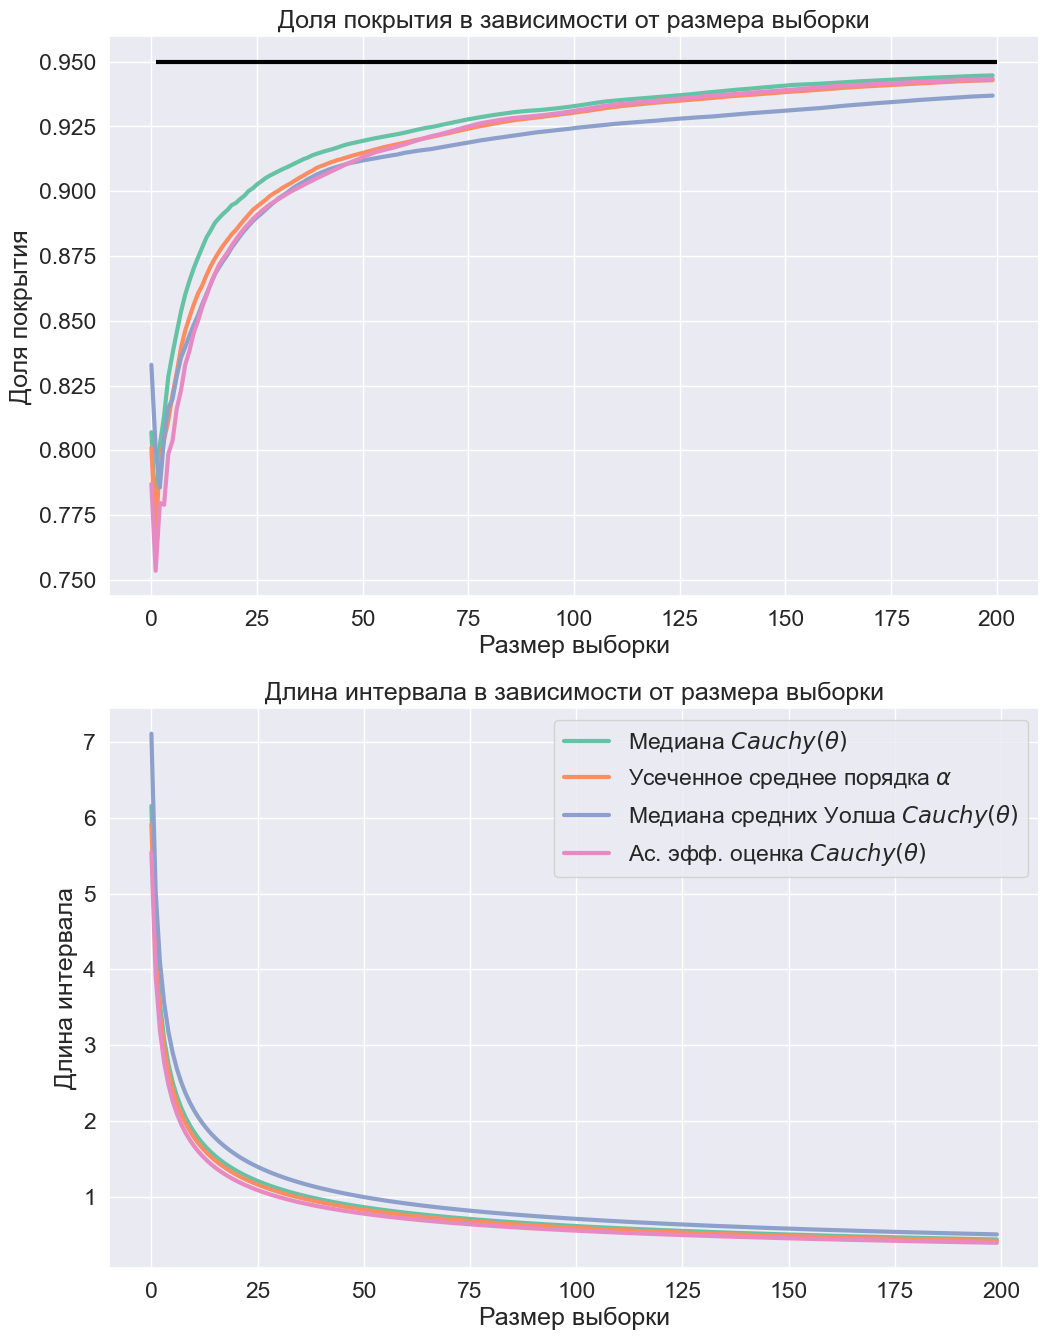

In [15]:
plt.figure(figsize=(12, 16))

plt.subplot(2, 1, 1)
for label in labels_array[1:]:
    plt.plot(coverage[label], label=label, lw=3)
plt.hlines(0.95, 1, sample_size, color='black', label='0.95', lw=3)

plt.xlabel("Размер выборки")
plt.ylabel("Доля покрытия")
plt.title("Доля покрытия в зависимости от размера выборки")

plt.subplot(2, 1, 2)
for label in labels_array[1:]:
    plt.plot(mean_length[label], label=label, lw=3)

plt.xlabel("Размер выборки")
plt.ylabel("Длина интервала")
plt.title("Длина интервала в зависимости от размера выборки")
plt.legend()
plt.show()


**Вывод:** 
Как легко заметно из графиков доля покрытия согласуется с выводами, которые мы получили ранее. Наилучшим образом показало себя усеченное среднее порядка $\alpha$, наихудщим среднее, что и следовало ожидать. Медиана, медиана средних Уолша и ассимптотически эффективная оценка примерно равны.